# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [1]:
from src.make_db import create_movies_db

In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [3]:
import os
import sqlite3
import pandas as pd
# Open up a connection
conn = sqlite3.connect('data/movies.db')
# Initialize a cursor
cursor = conn.cursor()

In [4]:
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
budgets['domestic_gross'] = budgets['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
budgets['production_budget'] = budgets['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [7]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [8]:
pop_query = '''SELECT *
                        FROM tmdb_movies
                        ORDER BY `popularity`+0 DESC; '''
pd.read_sql(pop_query, conn)

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
3,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
4,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [10]:
table_name_query = """SELECT * 
                      FROM tn_movie_budgets 
                      ORDER BY `production_budget`+0 DESC;"""

pd.read_sql(table_name_query, conn)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [11]:
budgets['end_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross'] - budgets['production_budget'] 
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09


In [12]:
budgets = budgets.sort_values(by='end_gross', ascending=False)
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...,...,...
480,81,"Dec 31, 2019",Army of the Dead,90000000.0,0.0,0.000000e+00,-9.000000e+07
479,80,"Dec 13, 2017",Bright,90000000.0,0.0,0.000000e+00,-9.000000e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.000000e+00,-1.500000e+08


In [95]:
dfsort = newdf.sort_values(by='movie')
dfsort.head(75)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross,Unnamed: 0,ID,Title,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4550,51.0,"Apr 18, 2014",13 Sins,4000000.0,9134.0,4.755200e+04,-3.943314e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2995,96.0,"Nov 25, 1987",3 Men and a Baby,15000000.0,167780960.0,1.677810e+08,3.205619e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3872,73.0,"Sep 30, 2011",50/50,8000000.0,35016118.0,4.133474e+07,6.835085e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2131,32.0,"Jun 15, 1977",A Bridge Too Far,26000000.0,50800000.0,5.080000e+07,7.560000e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,53.0,"Nov 20, 1998",A Bug's Life,45000000.0,162798565.0,3.630953e+08,4.808939e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,99.0,"Sep 30, 2005",Capote,7000000.0,28750530.0,4.992408e+07,7.167461e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17.0,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,1.298154e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,10.0,"Jul 22, 2011",Captain America: The First Avenger,140000000.0,176654505.0,3.705698e+08,4.072243e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,16.0,"Apr 4, 2014",Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,8.041488e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
top500 = df_count.sort_values(by='Title')
top500.head(50)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
644,644,645,13 Sins,2014,18+,6.3,65%,1,0,0,0,0,Daniel Stamm,"Horror,Thriller",United States,English,93.0
16376,16376,16377,3 Men and a Baby,1987,7+,6.0,75%,0,0,0,1,0,Leonard Nimoy,"Comedy,Drama,Family","United States,France",English,102.0
3574,3574,3575,50/50,2011,18+,7.6,93%,0,1,0,0,0,Jonathan Levine,"Comedy,Drama,Romance",United States,English,100.0
4605,4605,4606,A Bridge Too Far,1977,7+,7.4,64%,0,0,1,0,0,Richard Attenborough,"Drama,History,War",United States,"English,German,Dutch,Polish,Latin",175.0
16263,16263,16264,A Bug's Life,1998,all,7.2,92%,0,0,0,1,0,"John Lasseter,Andrew Stanton","Animation,Adventure,Comedy,Family",United States,English,95.0
210,210,211,A Ghost Story,2017,18+,6.9,91%,1,0,0,0,0,David Lowery,"Drama,Fantasy,Romance",United States,"English,Spanish",92.0
1329,1329,1330,A Haunted House,2013,18+,5.0,9%,1,0,0,0,0,Michael Tiddes,"Comedy,Fantasy",United States,"English,Spanish",86.0
189,189,190,A Most Violent Year,2014,18+,7.0,89%,1,0,0,0,0,J.C. Chandor,"Action,Crime,Drama,Thriller","United States,United Arab Emirates","English,Spanish",125.0
4609,4609,4610,A Most Wanted Man,2014,18+,6.8,87%,0,0,1,0,0,Anton Corbijn,"Crime,Drama,Thriller","United Kingdom,United States,Germany","Arabic,English,Turkish",122.0
3569,3569,3570,A Quiet Place,2018,13+,7.5,95%,0,1,1,0,0,John Krasinski,"Drama,Horror,Sci-Fi",United States,"English,American Sign Language",90.0


In [91]:
top500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 644 to 16225
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       500 non-null    int64  
 1   ID               500 non-null    int64  
 2   Title            500 non-null    object 
 3   Year             500 non-null    int64  
 4   Age              478 non-null    object 
 5   IMDb             500 non-null    float64
 6   Rotten Tomatoes  500 non-null    object 
 7   Netflix          500 non-null    int64  
 8   Hulu             500 non-null    int64  
 9   Prime Video      500 non-null    int64  
 10  Disney+          500 non-null    int64  
 11  Type             500 non-null    int64  
 12  Directors        493 non-null    object 
 13  Genres           500 non-null    object 
 14  Country          500 non-null    object 
 15  Language         500 non-null    object 
 16  Runtime          500 non-null    float64
dtypes: float64(2

In [14]:
type(budgets)

pandas.core.frame.DataFrame

In [27]:
stream_platform = pd.read_csv('data/MoviesOnStreamingPlatforms_updated.csv')
stream_platform

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [29]:
stream_platform = stream_platform.dropna(subset = ['Rotten Tomatoes'])
stream_platform

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16687,16688,Kazaam,1996,7+,3.0,6%,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [31]:
stream_platform['Title']

0                             Inception
1                            The Matrix
2                Avengers: Infinity War
3                    Back to the Future
4        The Good, the Bad and the Ugly
                      ...              
16671            George of the Jungle 2
16677                     That Darn Cat
16687                            Kazaam
16705                  Meet the Deedles
16719                        Pocahontas
Name: Title, Length: 5158, dtype: object

In [32]:
stream_title = stream_platform['Title']

In [33]:
budgets['movie']

0                                     Avatar
5200    Dracula: Pages from a Virgin's Diary
2300              The World's Fastest Indian
1500                        A Thousand Words
5400                   That Way Madness Lies
                        ...                 
4199                               The Train
3899          Me and Earl and the Dying Girl
4399                         Running Forever
5699              The Last House on the Left
3099                                  Brazil
Name: movie, Length: 5782, dtype: object

In [34]:
data_title = budgets['movie']

In [35]:
stream_platform[stream_platform['Title'].isin(data_title)]


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16552,16552,16553,Confessions of a Teenage Drama Queen,2004,7+,4.6,14%,0,0,0,1,0,Sara Sugarman,"Comedy,Family,Music,Romance","Germany,United States",English,89.0
16633,16633,16634,The Country Bears,2002,all,4.1,29%,0,0,0,1,0,Peter Hastings,"Comedy,Family,Music,Musical",United States,English,88.0
16643,16643,16644,Doug's 1st Movie,1999,all,5.0,26%,0,0,0,1,0,Maurice Joyce,"Animation,Adventure,Comedy,Drama,Family,Fantas...",United States,English,77.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [36]:
streammoviedata = stream_platform[stream_platform['Title'].isin(data_title)]

In [37]:
streammovie_titles = streammoviedata['Title']
streammovie_titles

0                                   Inception
1                                  The Matrix
2                      Avengers: Infinity War
3                          Back to the Future
6                                 The Pianist
                         ...                 
16552    Confessions of a Teenage Drama Queen
16633                       The Country Bears
16643                        Doug's 1st Movie
16705                        Meet the Deedles
16719                              Pocahontas
Name: Title, Length: 988, dtype: object

In [38]:
stream_platform[~stream_platform['Title'].isin(data_title)]


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
11,11,12,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0
12,12,13,Pan's Labyrinth,2006,18+,8.2,95%,1,0,0,0,0,Guillermo del Toro,"Drama,Fantasy,War","Mexico,Spain",Spanish,118.0
18,18,19,The King's Speech,2010,18+,8.0,95%,1,0,0,0,0,Tom Hooper,"Biography,Drama,History","United Kingdom,United States,Australia",English,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,16637,16638,Inspector Gadget 2,2003,all,3.4,40%,0,0,0,1,0,Alex Zamm,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0
16657,16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0


In [39]:
budgets[budgets['movie'].isin(streammovie_titles)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
4300,1,"Apr 10, 1981",Nighthawks,5000000.0,14600000.0,1.960000e+07,2.920000e+07
800,1,"Nov 21, 2012",Red Dawn,65000000.0,44806783.0,4.816415e+07,2.797093e+07
100,1,"May 29, 2009",Up,175000000.0,293004164.0,7.314634e+08,8.494675e+08
5700,1,"May 30, 2008",The Foot Fist Way,79000.0,234286.0,2.342860e+05,3.895720e+05
...,...,...,...,...,...,...,...
4699,100,"Nov 20, 1987",Teen Wolf Too,3000000.0,7888000.0,7.888000e+06,1.277600e+07
899,100,"Dec 25, 2018",Vice,60000000.0,47836282.0,7.088317e+07,5.871945e+07
3699,100,"Oct 4, 2013",Parkland,10000000.0,641439.0,1.616353e+06,-7.742208e+06
3499,100,"Jul 6, 2016",Sultan,11000000.0,5599781.0,7.298978e+07,6.758956e+07


In [40]:
budgets[~budgets['movie'].isin(streammovie_titles)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5200,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,1100000.0,39659.0,81371.0,-978970.0
2300,1,"Dec 7, 2005",The World's Fastest Indian,25000000.0,5128124.0,18991288.0,-880588.0
1500,1,"Mar 9, 2012",A Thousand Words,40000000.0,18450127.0,20790486.0,-759387.0
5400,1,"Dec 14, 2018",That Way Madness Lies,650000.0,1447.0,1447.0,-647106.0
5600,1,"Feb 24, 2015",Give Me Shelter,250000.0,0.0,0.0,-250000.0
...,...,...,...,...,...,...,...
4199,100,"Mar 7, 1965",The Train,5800000.0,6800000.0,6800000.0,7800000.0
3899,100,"Jun 12, 2015",Me and Earl and the Dying Girl,8000000.0,6758416.0,9266180.0,8024596.0
4399,100,"Oct 27, 2015",Running Forever,5000000.0,0.0,0.0,-5000000.0
5699,100,"Aug 30, 1972",The Last House on the Left,87000.0,3100000.0,3100000.0,6113000.0


In [41]:
df = budgets.loc[(budgets['domestic_gross'] > 0.0) & (budgets['worldwide_gross'] > 0.0)]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
5200,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,1100000.0,39659.0,8.137100e+04,-9.789700e+05
2300,1,"Dec 7, 2005",The World's Fastest Indian,25000000.0,5128124.0,1.899129e+07,-8.805880e+05
1500,1,"Mar 9, 2012",A Thousand Words,40000000.0,18450127.0,2.079049e+07,-7.593870e+05
5400,1,"Dec 14, 2018",That Way Madness Lies,650000.0,1447.0,1.447000e+03,-6.471060e+05
...,...,...,...,...,...,...,...
1199,100,"Jan 30, 2004",The Big Bounce,50000000.0,6471394.0,6.626115e+06,-3.690249e+07
4199,100,"Mar 7, 1965",The Train,5800000.0,6800000.0,6.800000e+06,7.800000e+06
3899,100,"Jun 12, 2015",Me and Earl and the Dying Girl,8000000.0,6758416.0,9.266180e+06,8.024596e+06
5699,100,"Aug 30, 1972",The Last House on the Left,87000.0,3100000.0,3.100000e+06,6.113000e+06


In [42]:
nonstream_eg=df[~df['movie'].isin(streammovie_titles)]
nonstream_eg

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5200,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,1100000.0,39659.0,81371.0,-978970.0
2300,1,"Dec 7, 2005",The World's Fastest Indian,25000000.0,5128124.0,18991288.0,-880588.0
1500,1,"Mar 9, 2012",A Thousand Words,40000000.0,18450127.0,20790486.0,-759387.0
5400,1,"Dec 14, 2018",That Way Madness Lies,650000.0,1447.0,1447.0,-647106.0
2800,1,"Nov 14, 1980",Raging Bull,18000000.0,23380203.0,23380203.0,28760406.0
...,...,...,...,...,...,...,...
1199,100,"Jan 30, 2004",The Big Bounce,50000000.0,6471394.0,6626115.0,-36902491.0
4199,100,"Mar 7, 1965",The Train,5800000.0,6800000.0,6800000.0,7800000.0
3899,100,"Jun 12, 2015",Me and Earl and the Dying Girl,8000000.0,6758416.0,9266180.0,8024596.0
5699,100,"Aug 30, 1972",The Last House on the Left,87000.0,3100000.0,3100000.0,6113000.0


In [70]:
df_nonstream = stream_platform[~stream_platform['Title'].isin(df_title)]
df_nonstream 

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
11,11,12,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0
12,12,13,Pan's Labyrinth,2006,18+,8.2,95%,1,0,0,0,0,Guillermo del Toro,"Drama,Fantasy,War","Mexico,Spain",Spanish,118.0
18,18,19,The King's Speech,2010,18+,8.0,95%,1,0,0,0,0,Tom Hooper,"Biography,Drama,History","United Kingdom,United States,Australia",English,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,16637,16638,Inspector Gadget 2,2003,all,3.4,40%,0,0,0,1,0,Alex Zamm,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0
16657,16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0


In [71]:
df_noncount = df_nonstream.sort_values('Rotten Tomatoes', ascending = False).head(500)
df_noncount

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
262,262,263,20 Feet from Stardom,2013,13+,7.4,99%,1,0,0,0,0,Morgan Neville,"Documentary,Biography,Music",United States,"English,Spanish",91.0
3590,3590,3591,Apollo 11,2019,all,8.2,99%,0,1,0,0,0,Todd Douglas Miller,"Documentary,History",United States,English,93.0
3562,3562,3563,Parasite,2019,18+,8.6,99%,0,1,1,0,0,Bong Joon Ho,"Comedy,Drama,Thriller",South Korea,"Korean,English",132.0
4511,4511,4512,For Sama,2019,7+,8.5,99%,0,0,1,0,0,"Waad Al-Kateab,Edward Watts","Documentary,War","United Kingdom,Syria,United States","Arabic,English",100.0
4854,4854,4855,Rivers and Tides,2001,all,7.9,99%,0,0,1,0,0,Thomas Riedelsheimer,Documentary,"Germany,Finland,United Kingdom,Canada",English,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,571,572,Raiders!: The Story of the Greatest Fan Film E...,2015,NaN,6.9,91%,1,0,0,0,0,"Jeremy Coon,Tim Skousen",Documentary,United States,English,106.0
550,550,551,The Confirmation,2016,13+,6.4,91%,1,0,0,0,0,Bob Nelson,"Comedy,Drama",Canada,English,101.0
4571,4571,4572,You Don't Know Jack,2010,NaN,7.6,91%,0,0,1,0,0,Barry Levinson,"Biography,Drama",United States,English,134.0
6509,6509,6510,Ghostbox Cowboy,2018,NaN,4.7,91%,0,0,1,0,0,John Maringouin,"Action,Adventure,Comedy,Crime,Drama,Thriller","China,United States",English,90.0


In [72]:
df_noncount_list = df_noncount['Title']
df_noncount_list

262                                  20 Feet from Stardom
3590                                            Apollo 11
3562                                             Parasite
4511                                             For Sama
4854                                     Rivers and Tides
                              ...                        
571     Raiders!: The Story of the Greatest Fan Film E...
550                                      The Confirmation
4571                                  You Don't Know Jack
6509                                      Ghostbox Cowboy
4492                                                Pride
Name: Title, Length: 500, dtype: object

In [43]:
nonstream_eg.describe() #not on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03
mean,50.186204,3.243548e+07,4.344763e+07,9.425513e+07,1.052673e+08
std,28.836660,4.005439e+07,6.501099e+07,1.661247e+08,2.017095e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.000000e+06,4.000000e+06,7.833752e+06,1.243676e+06
50%,50.000000,1.940000e+07,2.096664e+07,3.346201e+07,3.250004e+07
75%,75.000000,4.100000e+07,5.507109e+07,1.044966e+08,1.200958e+08
max,100.000000,3.500000e+08,9.366622e+08,2.208208e+09,2.683973e+09


In [44]:
onstream_eg=df[df['movie'].isin(streammovie_titles)]
onstream_eg

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
4300,1,"Apr 10, 1981",Nighthawks,5000000.0,14600000.0,1.960000e+07,2.920000e+07
800,1,"Nov 21, 2012",Red Dawn,65000000.0,44806783.0,4.816415e+07,2.797093e+07
100,1,"May 29, 2009",Up,175000000.0,293004164.0,7.314634e+08,8.494675e+08
5700,1,"May 30, 2008",The Foot Fist Way,79000.0,234286.0,2.342860e+05,3.895720e+05
...,...,...,...,...,...,...,...
4699,100,"Nov 20, 1987",Teen Wolf Too,3000000.0,7888000.0,7.888000e+06,1.277600e+07
899,100,"Dec 25, 2018",Vice,60000000.0,47836282.0,7.088317e+07,5.871945e+07
3699,100,"Oct 4, 2013",Parkland,10000000.0,641439.0,1.616353e+06,-7.742208e+06
3499,100,"Jul 6, 2016",Sultan,11000000.0,5599781.0,7.298978e+07,6.758956e+07


In [45]:
onstream_eg.describe() #on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,943.000000,9.430000e+02,9.430000e+02,9.430000e+02,9.430000e+02
mean,51.076352,4.130498e+07,5.904326e+07,1.303679e+08,1.481062e+08
std,28.907321,5.368128e+07,8.946631e+07,2.355588e+08,2.803931e+08
min,1.000000,3.000000e+04,3.880000e+02,7.030000e+02,-8.905748e+07
25%,26.000000,7.150000e+06,5.978240e+06,1.074536e+07,5.436333e+06
50%,51.000000,2.000000e+07,2.808716e+07,4.715865e+07,4.744992e+07
75%,76.500000,5.000000e+07,7.216403e+07,1.408390e+08,1.627550e+08
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.111853e+09


In [46]:
df_title = df['movie']

In [47]:
df_stream = stream_platform[stream_platform['Title'].isin(df_title)]
df_stream

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16552,16552,16553,Confessions of a Teenage Drama Queen,2004,7+,4.6,14%,0,0,0,1,0,Sara Sugarman,"Comedy,Family,Music,Romance","Germany,United States",English,89.0
16633,16633,16634,The Country Bears,2002,all,4.1,29%,0,0,0,1,0,Peter Hastings,"Comedy,Family,Music,Musical",United States,English,88.0
16643,16643,16644,Doug's 1st Movie,1999,all,5.0,26%,0,0,0,1,0,Maurice Joyce,"Animation,Adventure,Comedy,Drama,Family,Fantas...",United States,English,77.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [128]:
df_count = df_stream.sort_values('Rotten Tomatoes', ascending = False)
df_count

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4447,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,0,0,Greta Gerwig,"Comedy,Drama",United States,"English,Spanish",94.0
16220,16220,16221,Finding Nemo,2003,all,8.1,99%,0,0,0,1,0,"Andrew Stanton,Lee Unkrich","Animation,Adventure,Comedy,Family","United States,Australia",English,100.0
4474,4474,4475,Eighth Grade,2018,18+,7.4,99%,0,0,1,0,0,Bo Burnham,"Comedy,Drama",United States,English,93.0
3739,3739,3740,Gloria,2013,18+,6.8,99%,0,1,0,0,0,Edward Zwick,"Biography,Drama,History,War",United States,English,122.0
4534,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,0,0,Raoul Peck,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,6707,6708,Unfinished Business,2015,18+,5.4,10%,0,0,1,0,0,Ken Scott,"Comedy,Drama",United States,English,91.0
3974,3974,3975,House of D,2004,13+,7.0,10%,0,1,1,0,0,David Duchovny,"Comedy,Drama",United States,"English,French",97.0
6036,6036,6037,Killers,2010,13+,5.4,10%,0,0,1,0,0,Robert Luketic,"Action,Comedy,Romance,Thriller",United States,English,100.0
1702,1702,1703,The Watcher,2000,18+,5.3,10%,1,0,0,0,0,Tim Hunter,"Mystery,Thriller","Canada,United States",English,103.0


In [123]:
df_count[df_count.Title == 'Avatar']

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
16236,16236,16237,Avatar,2009,13+,7.8,82%,0,0,0,1,0,NaN,"Animation,Action,Adventure,Family,Fantasy,Mystery",United States,English,23.0


In [129]:
df_count_list = df_count['Title']
df_count_list

4447                      Lady Bird
16220                  Finding Nemo
4474                   Eighth Grade
3739                         Gloria
4534            I Am Not Your Negro
                    ...            
6707            Unfinished Business
3974                     House of D
6036                        Killers
1702                    The Watcher
1419     Silent Hill: Revelation 3D
Name: Title, Length: 917, dtype: object

In [130]:
dfbudgetfilter = df[df['movie'].isin(df_count_list)] #514 end_gross of top 500
dfbudgetfilter

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
505,6,"Nov 22, 2000",102 Dalmatians,85000000.0,66941559.0,6.694156e+07,4.888312e+07
4550,51,"Apr 18, 2014",13 Sins,4000000.0,9134.0,4.755200e+04,-3.943314e+06
58,59,"Nov 13, 2009",2012,200000000.0,166112167.0,7.576777e+08,7.237899e+08
1638,39,"Mar 28, 2008",21,35000000.0,81159365.0,1.598464e+08,2.060058e+08
5263,64,"Oct 24, 2014",23 Blast,1000000.0,549185.0,5.491850e+05,9.837000e+04
...,...,...,...,...,...,...,...
1282,83,"Nov 23, 2005","Yours, Mine and Ours",45000000.0,53359917.0,7.235992e+07,8.071983e+07
2347,48,"Oct 31, 2008",Zack and Miri Make a Porno,24000000.0,31457946.0,3.685631e+07,4.431425e+07
2366,67,"Oct 2, 2009",Zombieland,23600000.0,75590286.0,1.022366e+08,1.542269e+08
1725,26,"Aug 11, 2006",Zoom,35000000.0,11989328.0,1.250619e+07,-1.050448e+07


In [131]:
dfbudgetfilter['Year'] = pd.DatetimeIndex(dfbudgetfilter['release_date']).year
dfbudgetfilter

<ipython-input-131-af6d990da978>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbudgetfilter['Year'] = pd.DatetimeIndex(dfbudgetfilter['release_date']).year


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross,Year
505,6,"Nov 22, 2000",102 Dalmatians,85000000.0,66941559.0,6.694156e+07,4.888312e+07,2000
4550,51,"Apr 18, 2014",13 Sins,4000000.0,9134.0,4.755200e+04,-3.943314e+06,2014
58,59,"Nov 13, 2009",2012,200000000.0,166112167.0,7.576777e+08,7.237899e+08,2009
1638,39,"Mar 28, 2008",21,35000000.0,81159365.0,1.598464e+08,2.060058e+08,2008
5263,64,"Oct 24, 2014",23 Blast,1000000.0,549185.0,5.491850e+05,9.837000e+04,2014
...,...,...,...,...,...,...,...,...
1282,83,"Nov 23, 2005","Yours, Mine and Ours",45000000.0,53359917.0,7.235992e+07,8.071983e+07,2005
2347,48,"Oct 31, 2008",Zack and Miri Make a Porno,24000000.0,31457946.0,3.685631e+07,4.431425e+07,2008
2366,67,"Oct 2, 2009",Zombieland,23600000.0,75590286.0,1.022366e+08,1.542269e+08,2009
1725,26,"Aug 11, 2006",Zoom,35000000.0,11989328.0,1.250619e+07,-1.050448e+07,2006


In [132]:
df_count = df_count.rename(columns={"Title": "movie"})
df_count

,Unnamed: 0,ID,movie,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4447,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,0,0,Greta Gerwig,"Comedy,Drama",United States,"English,Spanish",94.0
16220,16220,16221,Finding Nemo,2003,all,8.1,99%,0,0,0,1,0,"Andrew Stanton,Lee Unkrich","Animation,Adventure,Comedy,Family","United States,Australia",English,100.0
4474,4474,4475,Eighth Grade,2018,18+,7.4,99%,0,0,1,0,0,Bo Burnham,"Comedy,Drama",United States,English,93.0
3739,3739,3740,Gloria,2013,18+,6.8,99%,0,1,0,0,0,Edward Zwick,"Biography,Drama,History,War",United States,English,122.0
4534,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,0,0,Raoul Peck,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,6707,6708,Unfinished Business,2015,18+,5.4,10%,0,0,1,0,0,Ken Scott,"Comedy,Drama",United States,English,91.0
3974,3974,3975,House of D,2004,13+,7.0,10%,0,1,1,0,0,David Duchovny,"Comedy,Drama",United States,"English,French",97.0
6036,6036,6037,Killers,2010,13+,5.4,10%,0,0,1,0,0,Robert Luketic,"Action,Comedy,Romance,Thriller",United States,English,100.0
1702,1702,1703,The Watcher,2000,18+,5.3,10%,1,0,0,0,0,Tim Hunter,"Mystery,Thriller","Canada,United States",English,103.0


In [135]:
last_data = df_count.merge(dfbudgetfilter, on=['movie', 'Year'])
last_data

,Unnamed: 0,ID,movie,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Genres,Country,Language,Runtime,id,release_date,production_budget,domestic_gross,worldwide_gross,end_gross
0,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,...,"Comedy,Drama",United States,"English,Spanish",94.0,53,"Nov 3, 2017",10000000.0,48958273.0,7.861077e+07,1.175690e+08
1,16220,16221,Finding Nemo,2003,all,8.1,99%,0,0,0,...,"Animation,Adventure,Comedy,Family","United States,Australia",English,100.0,25,"May 30, 2003",94000000.0,380529370.0,9.364294e+08,1.222959e+09
2,4474,4475,Eighth Grade,2018,18+,7.4,99%,0,0,1,...,"Comedy,Drama",United States,English,93.0,95,"Jul 13, 2018",2000000.0,13539710.0,1.434102e+07,2.588073e+07
3,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,...,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0,32,"Feb 3, 2017",1000000.0,7123919.0,9.617402e+06,1.574132e+07
4,16222,16223,Toy Story 3,2010,all,8.3,98%,0,0,0,...,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Spanish",103.0,47,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,1.283884e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,16251,16252,Mary Poppins,1964,all,7.8,100%,0,0,0,...,"Comedy,Family,Fantasy,Musical",United States,English,139.0,17,"Aug 26, 1964",6000000.0,102272145.0,1.022721e+08,1.985443e+08
751,6707,6708,Unfinished Business,2015,18+,5.4,10%,0,0,1,...,"Comedy,Drama",United States,English,91.0,32,"Mar 6, 2015",35000000.0,10219501.0,1.321405e+07,-1.156645e+07
752,6036,6037,Killers,2010,13+,5.4,10%,0,0,1,...,"Action,Comedy,Romance,Thriller",United States,English,100.0,54,"Jun 4, 2010",75000000.0,47059963.0,9.557275e+07,6.763271e+07
753,1702,1703,The Watcher,2000,18+,5.3,10%,1,0,0,...,"Mystery,Thriller","Canada,United States",English,103.0,77,"Sep 8, 2000",33000000.0,28946615.0,4.726783e+07,4.321444e+07


In [142]:
last_data['Rotten Tomatoes'] = last_data['Rotten Tomatoes'].replace({'%': ''}, regex=True).astype(float)

In [143]:
last_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 754
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         755 non-null    int64  
 1   ID                 755 non-null    int64  
 2   movie              755 non-null    object 
 3   Year               755 non-null    int64  
 4   Age                743 non-null    object 
 5   IMDb               755 non-null    float64
 6   Rotten Tomatoes    755 non-null    float64
 7   Netflix            755 non-null    int64  
 8   Hulu               755 non-null    int64  
 9   Prime Video        755 non-null    int64  
 10  Disney+            755 non-null    int64  
 11  Type               755 non-null    int64  
 12  Directors          747 non-null    object 
 13  Genres             755 non-null    object 
 14  Country            755 non-null    object 
 15  Language           754 non-null    object 
 16  Runtime            755 non

In [144]:
last_data.sort_values('Rotten Tomatoes', ascending = False)

,Unnamed: 0,ID,movie,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Genres,Country,Language,Runtime,id,release_date,production_budget,domestic_gross,worldwide_gross,end_gross
750,16251,16252,Mary Poppins,1964,all,7.8,100.0,0,0,0,...,"Comedy,Family,Fantasy,Musical",United States,English,139.0,17,"Aug 26, 1964",6000000.0,102272145.0,102272145.0,198544290.0
743,148,149,The Square,2013,NaN,8.1,100.0,1,1,1,...,"Comedy,Drama","Sweden,Germany,France,Denmark,United States","Swedish,English,Danish",151.0,100,"Oct 25, 2013",1500000.0,124244.0,176262.0,-1199494.0
744,4562,4563,The Sweet Hereafter,1997,18+,7.5,100.0,0,0,1,...,Drama,Canada,English,112.0,41,"Oct 10, 1997",5000000.0,4306697.0,7951247.0,7257944.0
745,16233,16234,Toy Story 2,1999,all,7.9,100.0,0,0,0,...,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Arabic,Spanish",92.0,40,"Nov 19, 1999",90000000.0,245852179.0,511358276.0,667210455.0
746,3693,3694,Sands of Iwo Jima,1949,NaN,7.1,100.0,0,1,0,...,"Action,Drama,Romance,War",United States,English,100.0,30,"Dec 14, 1949",1000000.0,7800000.0,7800000.0,14600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2043,2044,Zoom,2006,7+,4.4,3.0,1,0,0,...,"Action,Adventure,Comedy,Family,Fantasy,Sci-Fi",United States,English,93.0,26,"Aug 11, 2006",35000000.0,11989328.0,12506188.0,-10504484.0
624,7339,7340,Bless the Child,2000,18+,5.1,3.0,0,0,1,...,"Crime,Drama,Horror,Thriller","United States,Germany",English,107.0,78,"Aug 11, 2000",40000000.0,29374178.0,40435694.0,29809872.0
625,7495,7496,The Darkness,2016,13+,4.4,3.0,0,0,1,...,"Horror,Mystery,Thriller","Spain,United States,France,Italy","English,French",101.0,98,"May 13, 2016",4000000.0,10753574.0,10898293.0,17651867.0
693,4208,4209,Getaway,2013,13+,4.4,2.0,0,1,0,...,"Action,Crime,Thriller",United States,"English,Spanish",123.0,20,"Aug 30, 2013",18000000.0,10501938.0,11813989.0,4315927.0


In [145]:
last_data['Netflix'].value_counts() #1 = yes it is on

0    452
1    303
Name: Netflix, dtype: int64

In [146]:
last_data['Hulu'].value_counts()

0    633
1    122
Name: Hulu, dtype: int64

In [147]:
last_data['Prime Video'].value_counts()

0    456
1    299
Name: Prime Video, dtype: int64

In [148]:
last_data['Disney+'].value_counts()

0    621
1    134
Name: Disney+, dtype: int64

In [149]:
import matplotlib.pyplot as plt

In [159]:
numofmovie = [303, 122, 299, 134]
nameofplatform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

Text(0, 0.5, 'Number of Movies')

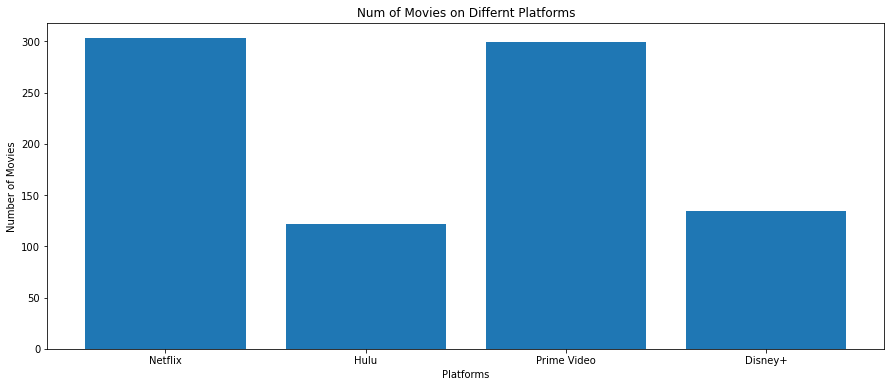

In [160]:
x = nameofplatform
y = numofmovie
plot_one_fig, plot_one_ax = plt.subplots(figsize = (15, 6))

plot_one_ax.bar(x,y)
plot_one_ax.set_title('Num of Movies on Differnt Platforms')
plot_one_ax.set_xlabel('Platforms')
plot_one_ax.set_ylabel('Number of Movies')

In [161]:
nonstream_eg.describe() #not on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03
mean,50.186204,3.243548e+07,4.344763e+07,9.425513e+07,1.052673e+08
std,28.836660,4.005439e+07,6.501099e+07,1.661247e+08,2.017095e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.000000e+06,4.000000e+06,7.833752e+06,1.243676e+06
50%,50.000000,1.940000e+07,2.096664e+07,3.346201e+07,3.250004e+07
75%,75.000000,4.100000e+07,5.507109e+07,1.044966e+08,1.200958e+08
max,100.000000,3.500000e+08,9.366622e+08,2.208208e+09,2.683973e+09


In [162]:
onstream_eg.describe() #on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,943.000000,9.430000e+02,9.430000e+02,9.430000e+02,9.430000e+02
mean,51.076352,4.130498e+07,5.904326e+07,1.303679e+08,1.481062e+08
std,28.907321,5.368128e+07,8.946631e+07,2.355588e+08,2.803931e+08
min,1.000000,3.000000e+04,3.880000e+02,7.030000e+02,-8.905748e+07
25%,26.000000,7.150000e+06,5.978240e+06,1.074536e+07,5.436333e+06
50%,51.000000,2.000000e+07,2.808716e+07,4.715865e+07,4.744992e+07
75%,76.500000,5.000000e+07,7.216403e+07,1.408390e+08,1.627550e+08
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.111853e+09


In [165]:
eg_value = [148.1062, 105.2673]
eg_x = ['On Stream', 'Not On Stream']

Text(0, 0.5, 'End Gross (In Millions)')

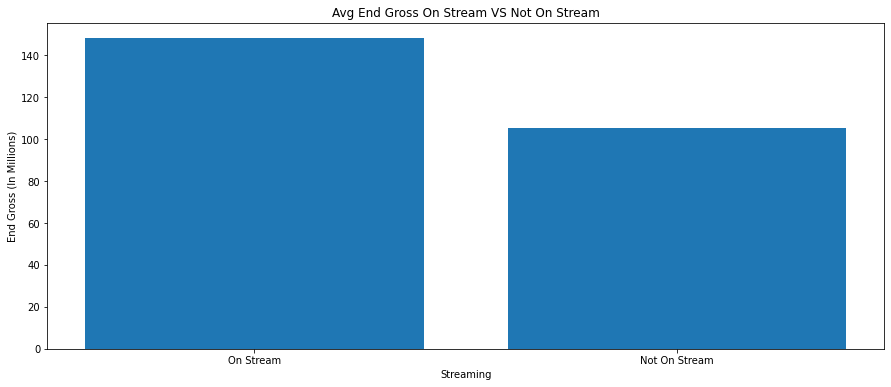

In [169]:
x = eg_x
y = eg_value
plot_one_fig, plot_one_ax = plt.subplots(figsize = (15, 6))

plot_one_ax.bar(x,y)
plot_one_ax.set_title('Avg End Gross On Stream VS Not On Stream')
plot_one_ax.set_xlabel('Streaming')
plot_one_ax.set_ylabel('End Gross (In Millions)')

In [103]:
dfbudgetfilter[dfbudgetfilter.movie == 'The Signal']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5718,19,"Feb 22, 2008",The Signal,50000.0,251150.0,406299.0,607449.0
4525,26,"Jun 13, 2014",The Signal,4000000.0,600896.0,2665322.0,-733782.0


In [63]:
dfnon = df[~df['movie'].isin(df_count_list)]
dfnon

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5200,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,1100000.0,39659.0,81371.0,-978970.0
2300,1,"Dec 7, 2005",The World's Fastest Indian,25000000.0,5128124.0,18991288.0,-880588.0
1500,1,"Mar 9, 2012",A Thousand Words,40000000.0,18450127.0,20790486.0,-759387.0
5400,1,"Dec 14, 2018",That Way Madness Lies,650000.0,1447.0,1447.0,-647106.0
2800,1,"Nov 14, 1980",Raging Bull,18000000.0,23380203.0,23380203.0,28760406.0
...,...,...,...,...,...,...,...
1199,100,"Jan 30, 2004",The Big Bounce,50000000.0,6471394.0,6626115.0,-36902491.0
4199,100,"Mar 7, 1965",The Train,5800000.0,6800000.0,6800000.0,7800000.0
3899,100,"Jun 12, 2015",Me and Earl and the Dying Girl,8000000.0,6758416.0,9266180.0,8024596.0
5699,100,"Aug 30, 1972",The Last House on the Left,87000.0,3100000.0,3100000.0,6113000.0


In [64]:
dfnon.describe()

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4720.000000,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03
mean,50.232415,3.294361e+07,4.325270e+07,9.325582e+07,1.035649e+08
std,28.841141,4.055619e+07,6.383581e+07,1.631921e+08,1.973609e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.500000e+06,4.059578e+06,8.000000e+06,1.133236e+06
50%,50.000000,2.000000e+07,2.129751e+07,3.409472e+07,3.301950e+07
75%,75.000000,4.200000e+07,5.512717e+07,1.042816e+08,1.196254e+08
max,100.000000,4.106000e+08,9.366622e+08,2.208208e+09,2.683973e+09
